In [157]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [158]:
dataset = pd.read_csv("dataChecked.csv") 
dataset.head()
X = dataset.iloc[:, 0:6]
y = dataset.iloc[:, 6]
X.shape
X.head()


,Length,Height (left),Height (right),Inner Frame (lower),Inner Frame (upper),Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [159]:
y.head()

0    y
1    y
2    y
3    y
4    y
Name: Genuine, dtype: object

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

print("la variance expliquée par chaque composant ",lda.explained_variance_ratio_)


la variance expliquée par chaque composant  [1.]


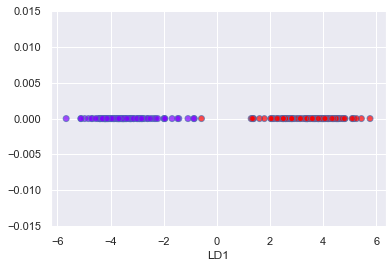

In [161]:
df = X.join(pd.Series(y, name='class'))
le = LabelEncoder()
y = le.fit_transform(df['class'])

plt.xlabel('LD1')
plt.scatter(
    X_lda[:,0],
    np.zeros(200),
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
print ("la variance expliquée par chaque composant",pca.explained_variance_ratio_)
df = X.join(pd.Series(y, name='class'))
le = LabelEncoder()
y = le.fit_transform(df['class'])


la variance expliquée par chaque composant [0.6675 0.2082]


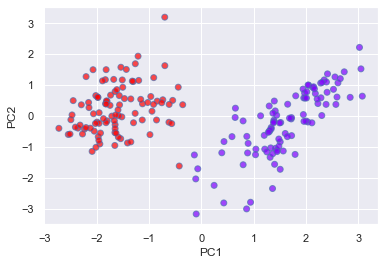

In [163]:
plt.xlabel ('PC1') 
plt.ylabel ('PC2') 
plt.scatter ( 
    X_pca [:, 0], 
    X_pca [:, 1], 
    c = y, 
    cmap = 'rainbow', 
    alpha = 0.7, 
    edgecolors = "b" 
)

In [164]:
print('l affectation de lelement 1 est ',lda.predict([[215.1, 130.0, 129.8 ,9.1 ,10.2, 141.5 ]]))
print('l affectation de lelement 2 est ',lda.predict([[214.7 ,130.7 ,130.8, 11.2 ,11.2, 139.4  ]]))
print('l affectation de lelement 3 est ',lda.predict([[214.3, 129.9, 129.9 ,10.2, 11.5 ,139.6 ]]))
print('l affectation de lelement 4 est ',lda.predict([[214.7 ,130.0 ,129.4 ,7.8, 10.0 ,141.2 ]]))

l affectation de lelement 1 est  ['y']
l affectation de lelement 2 est  ['n']
l affectation de lelement 3 est  ['n']
l affectation de lelement 4 est  ['y']
